# [KV Secret Engine](https://developer.hashicorp.com/vault/tutorials/secrets-management/versioned-kv)

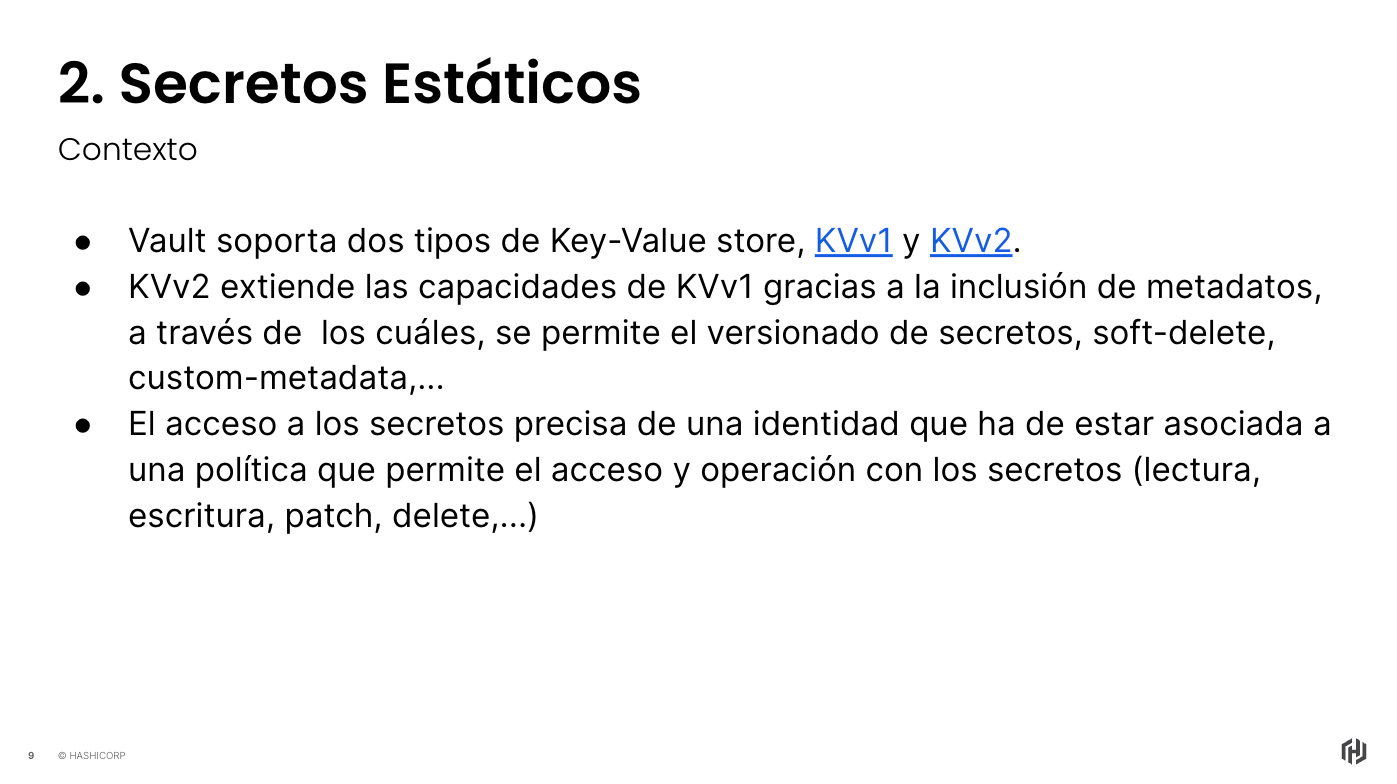

In [1]:
%env  WORKDIR=/tmp/vault

env: WORKDIR=/tmp/vault


In [2]:
%%bash
cat ${WORKDIR}/cluster-keys.json | jq -r ".root_token"

hvs.T2InYMFxTec0wrwvDhbvTOVy


In [3]:
%env VAULT_ADDR=https://127.0.0.1:8200
%env VAULT_TOKEN=hvs.T2InYMFxTec0wrwvDhbvTOVy
%env VAULT_CACERT=/tmp/vault/vault.ca
# %env VAULT_NAMESPACE=admin #Enable if using HCP

env: VAULT_ADDR=https://127.0.0.1:8200
env: VAULT_TOKEN=hvs.T2InYMFxTec0wrwvDhbvTOVy
env: VAULT_CACERT=/tmp/vault/vault.ca


In [4]:
%%bash
vault secrets list -detailed

Path          Plugin       Accessor              Default TTL    Max TTL    Force No Cache    Replication    Seal Wrap    External Entropy Access    Options    Description                                                UUID                                    Version    Running Version          Running SHA256    Deprecation Status
----          ------       --------              -----------    -------    --------------    -----------    ---------    -----------------------    -------    -----------                                                ----                                    -------    ---------------          --------------    ------------------
cubbyhole/    cubbyhole    cubbyhole_2087bbce    n/a            n/a        false             local          false        false                      map[]      per-token private secret storage                           f73b3937-5995-2304-92a3-1fe4c2b1c671    n/a        v1.14.1+builtin.vault    n/a               n/a
identity/     identity

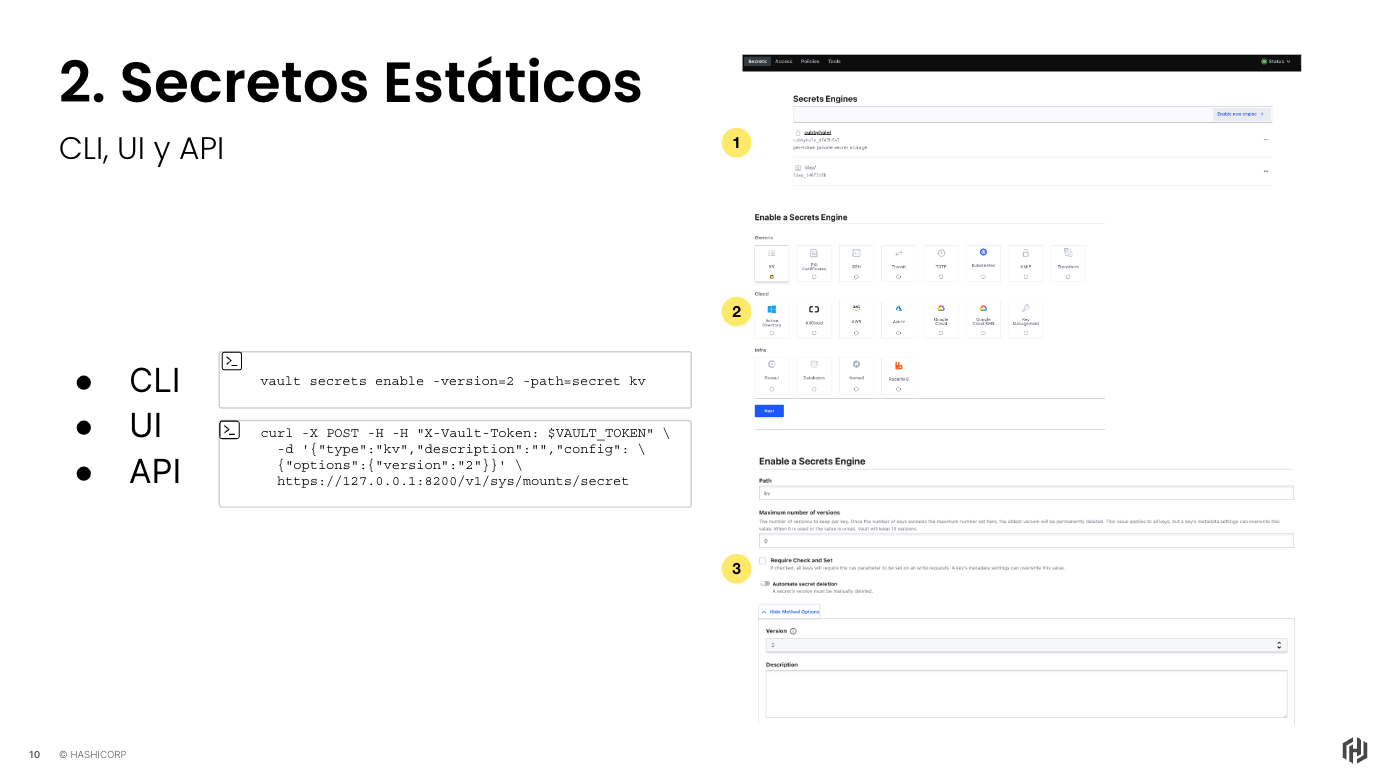

In [5]:
%%bash
#Enable KVv2
vault secrets enable -version=2 -path=secret kv

Success! Enabled the kv secrets engine at: secret/


## Test

In [6]:
%%bash
## Write secret via CLI to Ops path
vault kv put secret/ops/acme customer_name="ACME Inc." \
        contact_email="john.smith@acme.com"
vault kv put secret/ops/acme2 customer_name="ACME Inc." \
        contact_email="john.smith@acme.com"
vault kv put secret/ops/acme3 customer_name="ACME Inc." \
        contact_email="john.smith@acme.com"

# Diferenciando un secreto de un "directorio"
vault kv put secret/ops customer_name="ACME Inc." \
        contact_email="john.smith@acme.com"


==== Secret Path ====
secret/data/ops/acme

======= Metadata =======
Key                Value
---                -----
created_time       2023-09-14T08:08:49.193245218Z
custom_metadata    <nil>
deletion_time      n/a
destroyed          false
version            1
==== Secret Path ====
secret/data/ops/acme2

======= Metadata =======
Key                Value
---                -----
created_time       2023-09-14T08:08:49.263763426Z
custom_metadata    <nil>
deletion_time      n/a
destroyed          false
version            1
==== Secret Path ====
secret/data/ops/acme3

======= Metadata =======
Key                Value
---                -----
created_time       2023-09-14T08:08:49.334654676Z
custom_metadata    <nil>
deletion_time      n/a
destroyed          false
version            1
= Secret Path =
secret/data/ops

======= Metadata =======
Key                Value
---                -----
created_time       2023-09-14T08:08:49.410435676Z
custom_metadata    <nil>
deletion_time      n/a
des

In [7]:
%%bash
## Write secret via CLI to Dev path
vault kv put secret/dev/acme1 customer_name="Vault Inc." \
        contact_email="jenny.smith@vault.com"
vault kv put secret/dev/acme2 customer_name="Vault Inc." \
        contact_email="jenny.smith@vault.com"
vault kv put secret/dev/acme3 customer_name="Vault Inc." \
        contact_email="jenny.smith@vault.com"

==== Secret Path ====
secret/data/dev/acme1

======= Metadata =======
Key                Value
---                -----
created_time       2023-09-14T08:08:52.946134303Z
custom_metadata    <nil>
deletion_time      n/a
destroyed          false
version            1
==== Secret Path ====
secret/data/dev/acme2

======= Metadata =======
Key                Value
---                -----
created_time       2023-09-14T08:08:53.014182136Z
custom_metadata    <nil>
deletion_time      n/a
destroyed          false
version            1
==== Secret Path ====
secret/data/dev/acme3

======= Metadata =======
Key                Value
---                -----
created_time       2023-09-14T08:08:53.094056053Z
custom_metadata    <nil>
deletion_time      n/a
destroyed          false
version            1


In [8]:
%%bash 
## Write secret via API
## Include a new version of the secret
cat > $WORKDIR/secret.json <<EOF
{
  "data": {
    "name": "ACME Inc.",
    "contact_email": "jose@acme.com"
  }
}
EOF

## Unlike the kv put, here we have to set the api to v1 and go to the data endpoint
## The result is a new version of the existing secret
curl -k --header "X-Vault-Token: $VAULT_TOKEN" \
   --request POST \
   --data @$WORKDIR/secret.json \
   $VAULT_ADDR/v1/secret/data/ops/acme | jq


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   355  100   279  100    76    625    170 --:--:-- --:--:-- --:--:--   801


{
  "request_id": "646c7cab-d568-2f14-842d-ae73c6b5ced4",
  "lease_id": "",
  "renewable": false,
  "lease_duration": 0,
  "data": {
    "created_time": "2023-09-14T08:08:56.940346638Z",
    "custom_metadata": null,
    "deletion_time": "",
    "destroyed": false,
    "version": 2
  },
  "wrap_info": null,
  "warnings": null,
  "auth": null
}


In [9]:
%%bash
## We can add custom metadata
tee $WORKDIR/payload_metadata.json <<EOF
{
  "custom_metadata": {
    "Membership": "Platinum",
    "Region": "US West"
  }
}
EOF
## Request goes to the metadata and not data endpoint
curl -k --header "X-Vault-Token: $VAULT_TOKEN" \
   --request POST \
   --data @$WORKDIR/payload_metadata.json \
   $VAULT_ADDR/v1/secret/metadata/ops/acme


{
  "custom_metadata": {
    "Membership": "Platinum",
    "Region": "US West"
  }
}


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    79    0     0  100    79      0   3333 --:--:-- --:--:-- --:--:--  3950
